In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.read_csv('bank_data.csv')
df = pd.read_csv('bank_data.csv')
df

,id,x_coordinate,y_coordinate,money,time (hr)
0,0,2.851925,1.201712,29700,0.273403
1,1,4.150372,-2.654334,6500,0.064040
2,2,-1.494092,-1.230419,89400,0.127458
3,3,1.271326,-0.088520,96100,1.315029
4,4,2.471113,-0.592810,41100,0.164393
...,...,...,...,...,...
9995,9995,-2.472127,4.787304,2100,0.494904
9996,9996,1.034968,-4.321240,54900,0.492866
9997,9997,-0.512720,-2.949173,32200,0.933033
9998,9998,2.626841,-3.482923,5100,0.551312


In [2]:
dff = df.sort_values('money', ascending = False, ignore_index = True)
dfff = dff.iloc[:100,]
dfff['profit1'] = dfff.loc[:,'money'] / dfff.loc[:,'time (hr)']
dffff = dfff.sort_values('profit1', ascending = False, ignore_index = True)
dffff

<ipython-input-2-272088df909c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfff['profit1'] = dfff.loc[:,'money'] / dfff.loc[:,'time (hr)']


,id,x_coordinate,y_coordinate,money,time (hr),profit1
0,4789,-2.147768,3.800752,101200,0.036489,2.773426e+06
1,1372,-1.171577,-1.363085,98300,0.070664,1.391083e+06
2,5155,-1.610786,-4.638311,98600,0.082661,1.192823e+06
3,557,0.641967,-0.768273,98000,0.101143,9.689283e+05
4,6317,-3.049120,1.087724,101500,0.129198,7.856136e+05
...,...,...,...,...,...,...
95,8494,4.250860,0.018423,98500,1.427099,6.902115e+04
96,7364,-3.910959,-1.247246,98900,1.443518,6.851318e+04
97,1220,-4.792552,-0.559147,99300,1.456031,6.819909e+04
98,8731,-1.056023,-0.588819,97600,1.462601,6.673042e+04


Text(-2.259616, 1.907985, 'A')

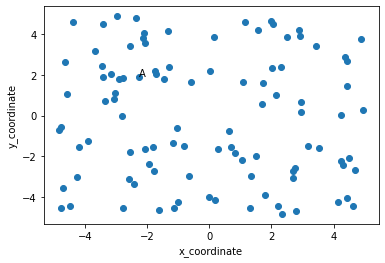

In [3]:
x = dffff['x_coordinate']
y = dffff['y_coordinate']

plt.xlabel('x_coordinate')
plt.ylabel('y_coordinate')
plt.scatter(x, y)
plt.annotate("A", (-2.259616, 1.907985))

In [9]:
time = dffff['time (hr)']
money = dffff['money']
bank = dffff['id']
profit1 = dffff['profit1']

In [10]:
class Robber:
    def __init__(self, time, money, bank, x, y):
        self.x = x
        self.y = y
        self.time = time
        self.bank = bank
        self.money = money
    def distance_traveled(self, current_x, current_y):
        self.current_x = current_x
        self.current_y = current_y
        self.distance = []
        for i in range(len(self.x)):
            self.distance.append(np.sqrt(((self.y[i] - current_y) ** 2) + ((self.x[i] - current_x) ** 2)))
        return distance
    
    def travel_time(self, current_bank, next_bank):
        return (np.sqrt((x[current_bank] - x[next_bank]) ** 2 + (y[current_bank] - y[next_bank]) ** 2)) / 30
                
    def travel_time_home(self, current_bank):
        return (np.sqrt((x[current_bank] - 0) ** 2 + (y[current_bank] - 0) ** 2)) / 30           
                
    def profit(self, start_bank):
        banks_robbed = []
        current_bank = start_bank
        money_raised = 0
        time_elapsed = 0
        for i in range(len(bank)):
            banks_robbed.append(current_bank)
            money_raised += money[current_bank]
            time_elapsed += time[current_bank]
            next_bank = current_bank + 1
            time_elapsed += self.travel_time(current_bank, next_bank)
            time_to_get_home = self.travel_time_home(next_bank)
            if time_elapsed + time_to_get_home > 24:
                break
            else:
                current_bank = next_bank
        return banks_robbed, money_raised

In [11]:
mike = Robber(time, money, bank, x, y)
mike.profit(0)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 4599400)

In [7]:
dffff['id'][mike.profit(0)[0]]

0     4789
1     1372
2     5155
3      557
4     6317
5     1447
6     7265
7     8125
8     6281
9     1684
10    6478
11    3216
12    8841
13    2463
14    9904
15    1707
16    8601
17    8405
18    3656
19    3061
20    1437
21    3050
22    6019
23    2869
24    7144
25    7521
26    9425
Name: id, dtype: int64

In [8]:
%timeit Robber(time, money, bank, x, y)

772 ns ± 31.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
